## BasketBall Performance Prediction

Given *data about basketball players*, let's try to predict **length of career** for a given player.

We will use a logistic regression model to make our predictions. 

Data source: https://www.kaggle.com/datasets/sachinsharma1123/performance-prediction

### Importing Libraries

In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

pd.set_option('display.max_columns', None)

In [5]:
data = pd.read_csv('summary.csv')
data

,Name,GamesPlayed,MinutesPlayed,PointsPerGame,FieldGoalsMade,FieldGoalsAttempt,FieldGoalPercent,3PointMade,3PointAttempt,3PointPercent,FreeThrowMade,FreeThrowAttempt,FreeThrowPercent,OffensiveRebounds,DefensiveRebounds,Rebounds,Assists,Steals,Blocks,Turnovers,Target
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,Chris Smith,80,15.8,4.3,1.6,3.6,43.3,0.0,0.2,14.3,1.2,1.5,79.2,0.4,0.8,1.2,2.5,0.6,0.2,0.8,0
1336,Brent Price,68,12.6,3.9,1.5,4.1,35.8,0.1,0.7,16.7,0.8,1.0,79.4,0.4,1.1,1.5,2.3,0.8,0.0,1.3,1
1337,Marlon Maxey,43,12.1,5.4,2.2,3.9,55.0,0.0,0.0,0.0,1.0,1.6,64.3,1.5,2.3,3.8,0.3,0.3,0.4,0.9,0
1338,Litterial Green,52,12.0,4.5,1.7,3.8,43.9,0.0,0.2,10.0,1.2,1.8,62.5,0.2,0.4,0.7,2.2,0.4,0.1,0.8,1


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               1340 non-null   object 
 1   GamesPlayed        1340 non-null   int64  
 2   MinutesPlayed      1340 non-null   float64
 3   PointsPerGame      1340 non-null   float64
 4   FieldGoalsMade     1340 non-null   float64
 5   FieldGoalsAttempt  1340 non-null   float64
 6   FieldGoalPercent   1340 non-null   float64
 7   3PointMade         1340 non-null   float64
 8   3PointAttempt      1340 non-null   float64
 9   3PointPercent      1329 non-null   float64
 10  FreeThrowMade      1340 non-null   float64
 11  FreeThrowAttempt   1340 non-null   float64
 12  FreeThrowPercent   1340 non-null   float64
 13  OffensiveRebounds  1340 non-null   float64
 14  DefensiveRebounds  1340 non-null   float64
 15  Rebounds           1340 non-null   float64
 16  Assists            1340 

In [7]:
df = data.copy()

In [8]:
# Drop Name column
df = df.drop('Name', axis=1)
df

,GamesPlayed,MinutesPlayed,PointsPerGame,FieldGoalsMade,FieldGoalsAttempt,FieldGoalPercent,3PointMade,3PointAttempt,3PointPercent,FreeThrowMade,FreeThrowAttempt,FreeThrowPercent,OffensiveRebounds,DefensiveRebounds,Rebounds,Assists,Steals,Blocks,Turnovers,Target
0,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0
1,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0
2,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0
3,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1
4,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,80,15.8,4.3,1.6,3.6,43.3,0.0,0.2,14.3,1.2,1.5,79.2,0.4,0.8,1.2,2.5,0.6,0.2,0.8,0
1336,68,12.6,3.9,1.5,4.1,35.8,0.1,0.7,16.7,0.8,1.0,79.4,0.4,1.1,1.5,2.3,0.8,0.0,1.3,1
1337,43,12.1,5.4,2.2,3.9,55.0,0.0,0.0,0.0,1.0,1.6,64.3,1.5,2.3,3.8,0.3,0.3,0.4,0.9,0
1338,52,12.0,4.5,1.7,3.8,43.9,0.0,0.2,10.0,1.2,1.8,62.5,0.2,0.4,0.7,2.2,0.4,0.1,0.8,1


In [9]:
# Fill missing values
df['3PointPercent'] = df['3PointPercent'].fillna(df['3PointPercent'].mean())

In [10]:
df.isna().sum().sum()

0

In [11]:
# Split df into X and y
y = df['Target']
X = df.drop('Target', axis=1)

In [12]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)

In [14]:
X_train.shape, X_test.shape

((937, 19), (403, 19))

In [15]:
X_train.describe()

,GamesPlayed,MinutesPlayed,PointsPerGame,FieldGoalsMade,FieldGoalsAttempt,FieldGoalPercent,3PointMade,3PointAttempt,3PointPercent,FreeThrowMade,FreeThrowAttempt,FreeThrowPercent,OffensiveRebounds,DefensiveRebounds,Rebounds,Assists,Steals,Blocks,Turnovers
count,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000
mean,60.940235,17.763927,6.856990,2.649626,5.936393,44.193063,0.246425,0.784312,18.920445,1.315475,1.845037,70.303842,1.012060,2.023693,3.033404,1.571185,0.623052,0.364995,1.208324
std,17.118823,8.240195,4.327108,1.661480,3.569689,5.976825,0.383654,1.073943,15.650915,0.996707,1.335551,10.463761,0.744218,1.325689,1.988333,1.505496,0.418690,0.417425,0.731579
min,11.000000,3.100000,0.700000,0.300000,0.900000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.300000,0.000000,0.000000,0.000000,0.100000
25%,48.000000,11.100000,3.800000,1.500000,3.400000,40.300000,0.000000,0.000000,0.000000,0.700000,0.900000,64.500000,0.500000,1.100000,1.600000,0.600000,0.300000,0.100000,0.700000
50%,63.000000,16.400000,5.600000,2.100000,4.900000,44.100000,0.100000,0.300000,22.000000,1.000000,1.500000,71.300000,0.800000,1.700000,2.600000,1.100000,0.500000,0.200000,1.000000
75%,77.000000,22.800000,8.800000,3.400000,7.500000,47.800000,0.400000,1.100000,32.100000,1.700000,2.300000,77.600000,1.400000,2.600000,3.900000,2.000000,0.800000,0.500000,1.500000
max,82.000000,40.900000,28.200000,10.200000,19.800000,66.200000,2.300000,6.500000,100.000000,7.700000,10.200000,100.000000,4.300000,9.600000,13.900000,9.300000,2.500000,3.900000,4.400000


In [16]:
# Scale X
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)

In [17]:
y_train

363     1
10      0
971     1
634     0
554     0
       ..
715     1
905     1
1096    0
235     1
1061    1
Name: Target, Length: 937, dtype: int64

In [18]:
X_train

,GamesPlayed,MinutesPlayed,PointsPerGame,FieldGoalsMade,FieldGoalsAttempt,FieldGoalPercent,3PointMade,3PointAttempt,3PointPercent,FreeThrowMade,FreeThrowAttempt,FreeThrowPercent,OffensiveRebounds,DefensiveRebounds,Rebounds,Assists,Steals,Blocks,Turnovers
363,0.997082,0.307933,0.564884,0.451871,0.073885,1.926287,-0.642652,-0.730700,-1.209549,1.088689,1.164907,0.114375,1.193755,0.887792,1.039916,-0.379602,-1.010958,0.083905,0.398906
10,-1.516114,-1.319111,-1.053689,-1.053615,-0.991202,-1.287836,-0.642652,-0.637536,0.919258,-0.818606,-0.932725,1.099251,-0.688418,-1.300919,-1.073535,-0.578978,-1.249926,-0.635171,-1.242257
971,1.230868,-0.226320,-0.267525,-0.391201,-0.234429,-0.651708,0.922090,0.946261,1.008758,-0.316686,-0.483233,0.735899,-0.285095,-0.168827,-0.218090,-0.180226,0.183880,-0.395479,-0.148148
634,-2.275918,-0.517731,-0.776219,-0.872957,-0.598801,-2.158328,-0.381862,0.014616,-0.499947,-0.316686,-0.408317,1.127937,-0.957300,-0.697136,-0.771613,0.351444,-0.055088,-0.155787,0.125379
554,0.880189,0.368643,-0.059423,-0.029885,0.129943,-0.584747,-0.381862,-0.544371,0.292762,0.084850,-0.033740,0.898451,-0.957300,-0.546191,-0.721293,1.148949,1.378719,-0.635171,1.356251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,0.880189,0.052948,-0.059423,-0.090104,-0.010200,-0.300163,1.443671,1.225755,1.315613,-0.517454,-0.707979,1.606031,-0.822859,-0.244300,-0.469692,-0.379602,-0.771991,-0.635171,-0.284912
905,0.938636,-0.165610,-0.105667,-0.150324,-0.262458,0.553589,-0.121071,-0.358042,1.264470,0.185234,0.116091,0.324737,0.118228,-0.168827,-0.067129,-0.512520,0.900783,-0.155787,-0.284912
1096,-0.639418,0.975749,0.749864,0.572310,0.606429,0.118343,1.182881,1.039426,1.123828,0.787537,0.640499,0.755023,0.118228,0.284010,0.234792,0.019150,2.095622,0.083905,-0.148148
235,-1.165435,-1.476958,-1.030566,-1.053615,-1.103316,-0.333643,-0.642652,-0.730700,-1.209549,-0.617838,-0.558148,-0.201167,-0.688418,-1.149973,-1.023214,-0.911272,-1.010958,-0.635171,-1.242257


### Training

In [21]:
model = LogisticRegression()
model.fit(X_train, y_train)

accuracy = model.score(X_test, y_test)

print("Test accuracy: {:.3f}%".format(accuracy*100))

Test accuracy: 71.216%


#### Clustering (k-means)

In [53]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X_train)
clusters = pd.Series(kmeans.labels_, name='Cluster', index=X_train.index)

In [54]:
clusters

363     0
10      1
971     3
634     1
554     3
       ..
715     3
905     3
1096    3
235     1
1061    3
Name: Cluster, Length: 937, dtype: int32

In [55]:
kmeans.cluster_centers_

array([[ 0.57189148,  0.30609142,  0.21026652,  0.25894026,  0.10762603,
         0.81230851, -0.58208947, -0.61413413, -0.69560175,  0.26849045,
         0.36782113, -0.23696769,  0.98030633,  0.74113847,  0.85890634,
        -0.35188477, -0.03130402,  0.73141445,  0.11241539],
       [-0.69675343, -0.83602175, -0.75183324, -0.74922829, -0.73588158,
        -0.2971408 , -0.31372174, -0.30692331, -0.08711157, -0.64263611,
        -0.64356247, -0.22531044, -0.54695162, -0.65751767, -0.64276453,
        -0.47842207, -0.62554491, -0.37270556, -0.68253331],
       [ 0.83956206,  1.98369299,  2.35800301,  2.30472049,  2.25772389,
         0.37781635,  0.59769253,  0.62132152,  0.24052851,  2.32267767,
         2.30873862,  0.3365146 ,  1.3790214 ,  1.64620099,  1.61859913,
         1.43909826,  1.5768871 ,  0.90528888,  2.18517145],
       [ 0.46556055,  0.55926924,  0.35336015,  0.32198043,  0.4572363 ,
        -0.34655498,  0.92325983,  0.93205674,  0.73418207,  0.10510649,
         0.017

In [56]:
pca = PCA(n_components=2)
X_reduced = pd.DataFrame(pca.fit_transform(X_train), index=X_train.index, columns=['PC1', 'PC2'])

In [57]:
centroids = pca.transform(kmeans.cluster_centers_)
centroids

/home/aditya/miniconda3/envs/dsenv/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


array([[ 1.17167166, -2.00498319],
       [-2.5119964 , -0.03546448],
       [ 6.99847148,  0.14558249],
       [ 1.06032781,  1.91051226]])

In [58]:
X_reduced

,PC1,PC2
363,1.858379,-2.680904
10,-3.918799,0.832184
971,-0.372334,1.690180
634,-2.197657,1.326911
554,0.556465,1.539913
...,...,...
715,-0.603175,2.408503
905,0.109021,0.130642
1096,2.142061,1.688440
235,-3.806854,-0.707097


In [59]:
X_reduced = pd.concat([X_reduced, y_train, clusters], axis=1)
X_reduced

,PC1,PC2,Target,Cluster
363,1.858379,-2.680904,1,0
10,-3.918799,0.832184,0,1
971,-0.372334,1.690180,1,3
634,-2.197657,1.326911,0,1
554,0.556465,1.539913,0,3
...,...,...,...,...
715,-0.603175,2.408503,1,3
905,0.109021,0.130642,1,3
1096,2.142061,1.688440,0,3
235,-3.806854,-0.707097,1,1


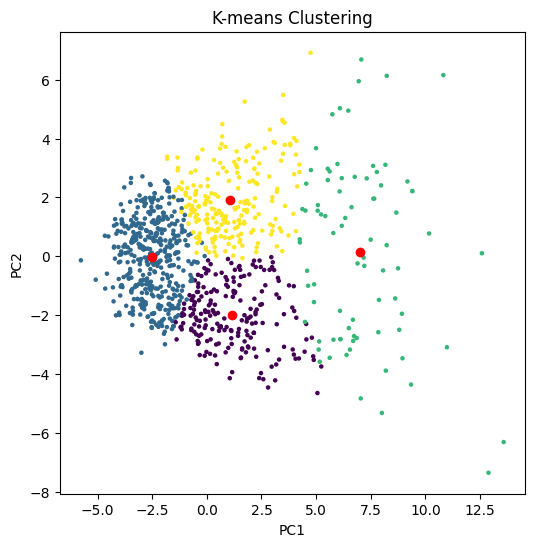

In [60]:
plt.figure(figsize=(6,6))
plt.scatter(X_reduced['PC1'], X_reduced['PC2'], 5, c=X_reduced['Cluster'])
plt.scatter(centroids[:, 0], centroids[:, 1], color='red')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("K-means Clustering")
plt.show()